Cost after iteration 0: 0.693147
Cost after iteration 100: 0.677188
Cost after iteration 200: 0.669620
Cost after iteration 300: 0.663909
Cost after iteration 400: 0.659084
Cost after iteration 500: 0.654790
Cost after iteration 600: 0.650861
Cost after iteration 700: 0.647206
Cost after iteration 800: 0.643769
Cost after iteration 900: 0.640512
train accuracy: 65.9375 %
test accuracy: 57.83333333333333 %


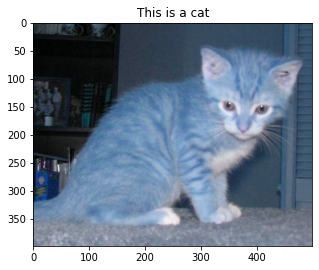

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import scipy

ROWS = 60
COLS = 60
CHANNELS = 3

TRAIN_DIR = '/content/drive/MyDrive/AI_SGROUP/Machine_Learning/Logistict-Regression/training_set/training_set/'
TEST_DIR = '/content/drive/MyDrive/AI_SGROUP/Machine_Learning/Logistict-Regression/test_set/test_set/'



def list_image(dir,num_sample):
    images=[]
    for folder in os.listdir(dir):
        count=0
        for file_name in os.listdir(dir+folder):
            path =dir+folder+'/'+file_name
            images.append(path)
            count+=1
            if count ==num_sample:
                break
    return images

train_images= list_image(TRAIN_DIR,800)
test_images=list_image(TEST_DIR,300)

def read_image(file_path):
    try:
      img = cv2.imread(file_path, cv2.IMREAD_COLOR)
      img=cv2.resize(img, (ROWS, COLS), interpolation=cv2.INTER_CUBIC)
    except:
      return img
    return img
 
def prepare_data(images):
    m = len(images)
    X = np.zeros((m, ROWS, COLS, CHANNELS))
    y = np.zeros((1, m))
    for i, image_file in enumerate(images):
        X[i,:] = read_image(image_file)
        if 'dog' in image_file.lower():
            y[0, i] = 1
        elif 'cat' in image_file.lower():
            y[0, i] = 0
    return X, y

def sigmoid(z):
    return 1/(1+np.exp(-z))

def propagate(w, b, X, Y):
    m = X.shape[1]
    z = np.dot(w.T, X)+b 
    A = sigmoid(z)                               
    cost = (-np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))/m 
    dw = (np.dot(X,(A-Y).T))/m 
    db = np.average(A-Y) 
    cost = np.squeeze(cost)
    return dw,db,cost 

def optimize(w, b, X, Y, epoch, lr, print_cost = False):
    for i in range(epoch):
        dw,db,cost=propagate(w,b,X,Y)
        w = w - lr*dw
        b = b - lr*db  
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    return w,b

def predict(w, b, X):    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)  
    z = np.dot(w.T, X) + b
    A = sigmoid(z)
    
    for i in range(A.shape[1]):
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0,i] > 0.5:
            Y_prediction[[0],[i]] = 1
        else: 
            Y_prediction[[0],[i]] = 0
    return Y_prediction



def model(X_train, Y_train, X_test, Y_test, num_iterations , learning_rate , print_cost = False):
    # initialize parameters with zeros
    w=np.zeros((X_train.shape[0], 1))
    b=0
    # Gradient descent
    w,b = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    return w,b
def display (img):

    my_image = read_image(img).reshape(1, ROWS*COLS*CHANNELS).T
    my_predicted_image = predict(w,b, my_image)
    if np.squeeze(my_predicted_image).all()==1:
      tit='dog'
    else:
      tit='cat'
    image = cv2.imread(img, cv2.IMREAD_COLOR)
    plt.figure(figsize = (5,5))
    plt.imshow(image)
    plt.title("This is a "+tit)
    plt.show()


train_set_x, train_set_y = prepare_data(train_images)
test_set_x, test_set_y = prepare_data(test_images)
train_set_x_flatten = train_set_x.reshape(train_set_x.shape[0], ROWS*COLS*CHANNELS).T
test_set_x_flatten = test_set_x.reshape(test_set_x.shape[0], -1).T
train_set_x = train_set_x_flatten/255
test_set_x = test_set_x_flatten/255
w,b = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = 0.001, print_cost = True)

test_image = "/content/drive/MyDrive/AI_SGROUP/Machine_Learning/Logistict-Regression/test_set/test_set/cats/cat.4003.jpg"
display(test_image)


# test_image1 = "/content/drive/MyDrive/AI_SGROUP/Machine_Learning/Logistict-Regression/test_set/test_set/dogs/dog.4003.jpg"
# my_image1 = read_image(test_image1).reshape(1, ROWS*COLS*CHANNELS).T
# my_predicted_image1 = predict(w,b, my_image1)
# print("dog  ",np.squeeze(my_predicted_image1))

# dog: 2000    0.01
# cat 0.001
